In [4]:
## Basic Settings
    options(warn = -1) ## 경고 지우기
    options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
# Basic Graph Google Font Setting
    library(showtext) ## plot : 구글 폰트 사용 
    font_add_google(name = "Noto Serif KR",family = "noto-serif")
    showtext_auto(TRUE)

## Data Fetch (basic)
    ## CSV file
    # read.csv('',
    #         na.strings=NA, header = T, sep=",",encoding = "UTF-8") 

    ## Text File
    # readtable("", 
    #          encoding ="EUC-KR", fileEncoding ="UTF-8", 
    #          colnames =varnames,
    #          hearder =F, skip =0, nrows =-1, sep="")

# Libraries for data fetching
    library(jsonlite) # JSON file fetch
    # fromJSON("") #: json file fetch
    library(XML) # XML file fetch
    # xmlToDataFrame("")
    library(readxl) # excel file fetch
    # read_excel("", sheet =2)

## 함수 정리 

## 기본함수 : data, str, length, ncol, nrow, dim, ls, head, tail, library, 
    # data<- c(1,2,3)
    # label = c('a','b','c')
    # names(data)<-label
    
    # matrix( data, nrow= 2, ncol=3 , byrow=T)
    # array(data, dim = c(2,3))
    # list(data, "hello")
    # factor(data, labels= label)

## 기본 통계량 mean, median, min, max, range, sd, hist, barplot, stem, var
    # range(data) #: data 의 최대 최소 출력
    # var(data)  #: data 의 분산값 출력
    # quantile(data, probs = 0.25) # :  사분위 수 출력 함수 

## 데이터 처리 : apply, sapply, lapply 

## 데이터 시각화
    # stem(col, scale =1)
    # hist(data) # : data 의 histogram(연속 분포함수 ) 
    # barplot(data, ylim =c(0:10), main= "title", xlab="x label", ylab="y label", names =colnames(data)), 


## Libraries for DATA
    library(stringr) # stringr 불러오기
    library(dplyr) # dplyr : 데이터 가공 함수 -> 
    # filter(data,  a>1) : 특정 row 추출
    # select(data, a, b) : 특정 column 추출
    # arrange(data, desc(a))
    # mutate(data, a_rank =rank(a)) # a칼럼 값을 기준으로 rank 를 매겨 새로운 랭크 칼럼을 생성
    # distinct(data, a,b) # data 의 a, b 칼럼을 기준으로 중복된 행을 제거 (a와 b 가 동시에 중복)
    # summarise(data, a_mean = mean(a), a_min= min(a), a_sd = sd(a) .. func(a)) # a 칼럼의 평균, 등등의 함수 값 요약. 

    library(descr) # descr : 데이터 설명 함수 
    # freq(data, plot =F, main ="title") # : data row 별 빈도수 
    library(psych) # psych : 데이터 시각화 함수 pairs.panel(iris)
    # kurtosi(data) #: data 의 첨도값 출력 / psych 
    # skew(data) #: data 의 왜도값 출력 /psysy


library(reshape2) # data layout 변환 
library(ggplot2) # 그래프 
library(plotrix) # 3D pie
library(RColorBrewer) # color package
library(tidyverse)
library(hrbrthemes)
library(kableExtra)

library(caret) # data sampling 
library(randomForest) # prediction model 
library(nnet)


#library(extrafont)
# Functions 
dataDescription <- function(data){
    columns <-c()
    cat("\n\n *** 칼럼 별 데이터 빈도 조사 ***\n\nData Columns :  ",ncol(data),"개","\n\n\n")
    for( i in 1:ncol(data)){
        cat(" ",i ,". ", colnames(data)[i],"\n", sep = "")
        columnDesc(data[colnames(data)[i]])
        columns<- append(columns,colnames(data)[i])
    }
    return(columns)
}


columnDesc<- function(column){
    par(bg = "white")
    # 시장이름의 개수
    cat( "\n ***[",names(column), "]칼럼의 데이터 종류 개수:",nrow(unique(column)), sep = "")
    # 가장 빈도가 많은 데이터와 적은 데이터 각각 5개 
    dataFreq_top5<- head(arrange(as.data.frame(freq(as.matrix(column), plot =F)), desc(Frequency))[2:6,],5)
    dataFreq_bot5<-tail(arrange(as.data.frame(freq(as.matrix(column), plot =F)), desc(Frequency)),5)
    cat("\n\n-----[",names(column),"] 에서 가장 빈도가 많은 데이터 top 5 \n")
    print(dataFreq_top5)
    cat("\n\n-----[",names(column),"] 에서 가장 빈도가 적은 데이터 5 개 \n")
    print(dataFreq_bot5)

    cat("\n\n\n")

}




[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [112]:
# Functions 
dataDescription <- function(data){
    columns <-c()
    cat("\n\n *** 칼럼 별 데이터 빈도 조사 ***\n\nData Columns :  ",ncol(data),"개","\n\n\n")
    for( i in 1:ncol(data)){
        cat(" ",i ,". ", colnames(data)[i],"\n", sep = "")
        columnDesc(data[colnames(data)[i]])
        columns<- append(columns,colnames(data)[i])
    }
    return(columns)
}


columnDesc<- function(column){
    par(bg = "white")
    # 시장이름의 개수
    cat( "\n ***[",names(column), "]칼럼의 데이터 종류 개수:",nrow(unique(column)), sep = "")
    # 가장 빈도가 많은 데이터와 적은 데이터 각각 5개 
    dataFreq_top5<- head(arrange(as.data.frame(freq(as.matrix(column), plot =F)), desc(Frequency))[2:6,],5)
    dataFreq_bot5<-tail(arrange(as.data.frame(freq(as.matrix(column), plot =F)), desc(Frequency)),5)
    cat("\n\n-----[",names(column),"] 에서 가장 빈도가 많은 데이터 top 5 \n")
    print(dataFreq_top5)
    cat("\n\n-----[",names(column),"] 에서 가장 빈도가 적은 데이터 5 개 \n")
    print(dataFreq_bot5)

    cat("\n\n\n")

}


In [29]:
# Data fetch 
## Data Fetch (basic)
# CSV file
livP18<-read.csv('../Data/SeoulPublicShareData/SeoulBigData2/생필품 농수축산물 가격 정보(2018년).csv',fileEncoding = "EUC-KR") 
livP19<-read.csv('../Data/SeoulPublicShareData/SeoulBigData2/생필품 농수축산물 가격 정보(2019년).csv',fileEncoding = "EUC-KR") 
livP20<-read.csv('../Data/SeoulPublicShareData/SeoulBigData2/생필품 농수축산물 가격 정보(2020년).csv',fileEncoding = "EUC-KR") 
livP21<-read.csv('../Data/SeoulPublicShareData/SeoulBigData2/생필품 농수축산물 가격 정보(2021년).csv',fileEncoding = "EUC-KR") 
livP22<-read.csv('../Data/SeoulPublicShareData/SeoulBigData2/생필품 농수축산물 가격 정보(2022년).csv',fileEncoding = "EUC-KR") 
            

#dataDescription(livingProduct2018)

In [113]:
#columnDesc(livP18['시장.마트.이름'])
#martName<-livP18['시장.마트.이름']
columns<-dataDescription(livP18)
columns





 *** 칼럼 별 데이터 빈도 조사 ***

Data Columns :   14 개 


 1. 일련번호

 ***[일련번호]칼럼의 데이터 종류 개수:20397

-----[ 일련번호 ] 에서 가장 빈도가 많은 데이터 top 5 
        Frequency     Percent
1188918         1 0.004902682
1188919         1 0.004902682
1188920         1 0.004902682
1188921         1 0.004902682
1188922         1 0.004902682


-----[ 일련번호 ] 에서 가장 빈도가 적은 데이터 5 개 
        Frequency     Percent
1348750         1 0.004902682
1348751         1 0.004902682
1348752         1 0.004902682
1348753         1 0.004902682
1348754         1 0.004902682



 2. 시장.마트.번호

 ***[시장.마트.번호]칼럼의 데이터 종류 개수:102

-----[ 시장.마트.번호 ] 에서 가장 빈도가 많은 데이터 top 5 
   Frequency  Percent
1        204 1.000147
2        204 1.000147
6        204 1.000147
8        204 1.000147
10       204 1.000147


-----[ 시장.마트.번호 ] 에서 가장 빈도가 적은 데이터 5 개 
    Frequency   Percent
218       201 0.9854390
129       170 0.8334559
122       153 0.7501103
224        51 0.2500368
202        34 0.1666912



 3. 시장.마트.이름

 ***[시장.마트.이름]칼럼의 데이터 종류 개수:102

-----[ 시장.마

[1] "일련번호"                      "시장.마트.번호"               
 [3] "시장.마트.이름"                "품목.번호"                    
 [5] "품목.이름"                     "실판매규격"                   
 [7] "가격.원."                      "년도.월"                      
 [9] "비고"                          "시장유형.구분.시장.마트..코드"
[11] "시장유형.구분.시장.마트..이름" "자치구.코드"                  
[13] "자치구.이름"                   "점검일자"

,자치구,마트이름,품목,가격,년월
,<chr>,<chr>,<chr>,<int>,<chr>
1,강동구,이마트명일점,"쇠고기(한우,불고기)",45000,2018-08
2,강동구,이마트명일점,"쇠고기(한우,불고기)",43200,2018-11
3,강동구,이마트명일점,"쇠고기(한우,불고기)",42000,2018-01
4,강동구,이마트명일점,"쇠고기(한우,불고기)",41400,2018-07
5,강동구,이마트명일점,"쇠고기(한우,불고기)",41400,2018-02
6,강동구,이마트명일점,"쇠고기(한우,불고기)",39600,2018-06


[1] 12 11 10  9  8  7  6  5  4  3  2  1

자치구,마트이름,품목,가격,년월
<chr>,<chr>,<chr>,<int>,<int>
강동구,이마트명일점,"쇠고기(한우,불고기)",30000,12
강동구,이마트명일점,"쇠고기(한우,불고기)",43200,11
강동구,이마트명일점,"쇠고기(한우,불고기)",31680,10
강동구,이마트명일점,"쇠고기(한우,불고기)",27000,9
강동구,이마트명일점,"쇠고기(한우,불고기)",45000,8
강동구,이마트명일점,"쇠고기(한우,불고기)",41400,7
강동구,이마트명일점,"쇠고기(한우,불고기)",39600,6
강동구,이마트명일점,"쇠고기(한우,불고기)",39600,5
강동구,이마트명일점,"쇠고기(한우,불고기)",38400,4


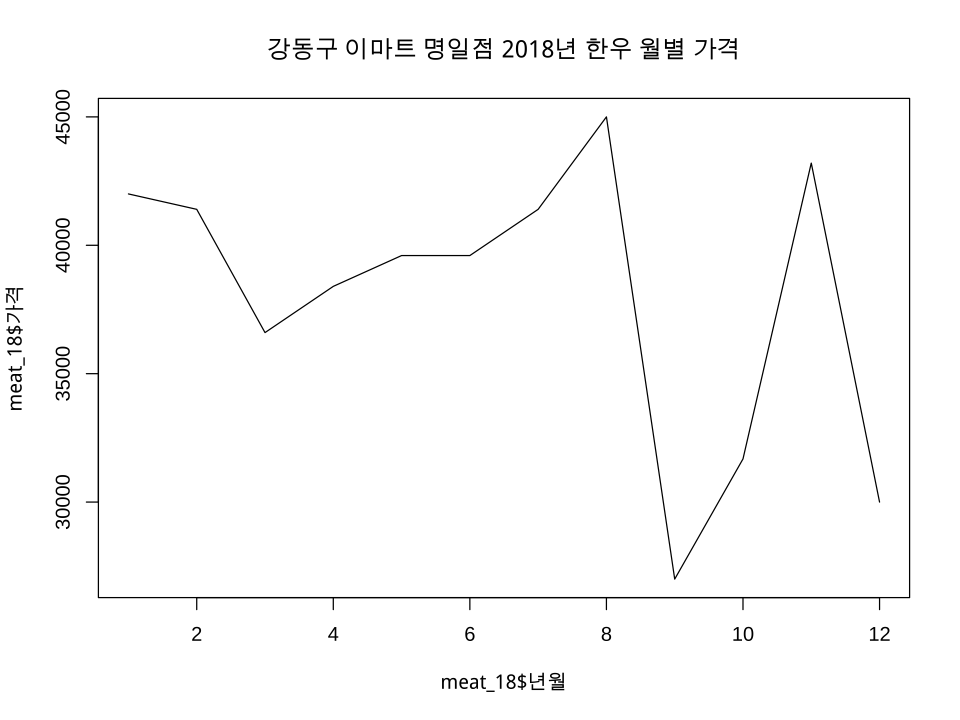

In [160]:
# 관심있는 칼럼만 정제 => 3,5,7,8,13
livP18_i<-livP18[c(13,3,5,7,8)]

#자치구별  시장 마트 이름 정리
colnames(livP18_i)<-c('자치구','마트이름','품목','가격','년월')
emart<-filter(livP18_i, 자치구=='강동구'& 마트이름 =='이마트명일점')
# 강동구 이마트 명일점 (집앞) 가장 비싼 가격 순
head(arrange(emart, desc(가격)) )
# 이마트 쇠고기와 돼지고기  가격 변동 2018년도 
meat_18<-filter(emart, str_detect(품목,'쇠고기') )

newcol <-c()
for( i in meat_18['년월']){
    newcol <- append(newcol,as.integer(str_remove_all(i,pattern = "2018-")))
}
newcol
meat_18['년월']<-newcol
meat_18
par(bg ='white')
plot(meat_18$`년월`, meat_18$가격, type = 'l', main = '강동구 이마트 명일점 2018년 한우 월별 가격')
